In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import numpy as np
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
df = pd.read_csv("~/project/GitHub/m154/nbs/data/GiveMeSomeCredit/cs-training.csv")
#print(df)
#print(df.dropna())

# Remove the rows with NA's
df = df.dropna()
# Let's work with 500 rows
df = df.iloc[0:500, :]

In [3]:
Graphtype = nx.Graph()
Graph = nx.from_pandas_edgelist(df, "SeriousDlqin2yrs", 'MonthlyIncome', edge_attr=True, create_using=Graphtype)
#pos = nx.spring_layout(Graph, scale=1)
#nx.draw(Graph, pos, with_labels=True)
#plt.show()

In [4]:
num_nodes = len(df['age'])
node2vec_model = Node2Vec(Graph, dimensions=64, walk_length=30, num_walks=200) 
model = node2vec_model.fit(window=10,min_count = 1, batch_words=4)

Computing transition probabilities:   0%|          | 0/336 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:00<00:00,  1.66it/s]


In [5]:
emb=model.wv[[i for i in model.wv.key_to_index]]
emb.shape

(338, 64)

In [6]:
def plot_embeddings(emb, num_nodes, title=""):
    if emb.shape[1] > 2:
        pca = PCA(n_components=2)
        emb= pca.fit_transform(emb)
    plt.figure()
    sc = plt.scatter(emb[:,0], emb[:,1])
    plt.legend(handles = sc.legend_elements()[0], title="Clusters")
    plt.suptitle(title)
    plt.show()

/gpfs/ysm/project/sumry2022/sumry2022_ta483/conda_envs/m154/lib/python3.7/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


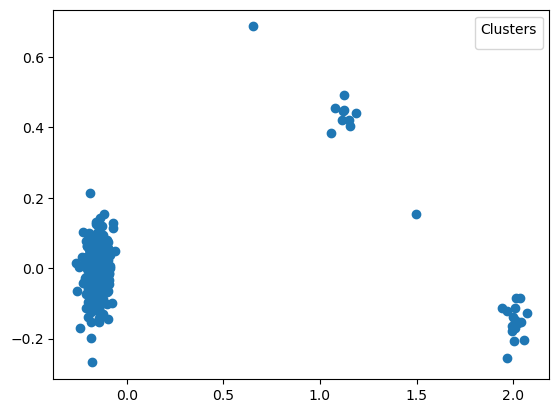

In [7]:
plot_embeddings(emb, 338)